In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import time

(394, 451)

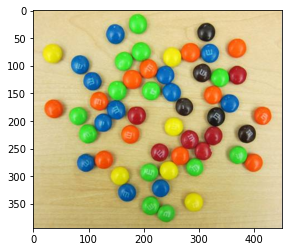

In [8]:
img = cv2.imread('mandm.png')
# convert 16bit to 8bit
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = np.array(np.rint(255 * ((img - img.min()) / (img.max() - img.min()))), dtype=np.uint8)

img_lab = cv2.cvtColor(img,cv2.COLOR_RGB2LAB)

plt.imshow(img)
img[:,:,0].shape

# 1

In [9]:
def count_diff(lab,x,y,clusters): # find the minimum difference index of cluster for this pixel
    lab=np.append(lab,x)
    lab=np.append(lab,y)
    diff = [np.sum(np.square(clusters[i]-lab)) for i in range(len(clusters))]
    return diff.index(min(diff))
def classifer(img,clusters): # calculate the clusters that each piexl belongs to
    row,col = img[:,:,0].shape
    ans = np.zeros(img[:,:,0].shape)
    for i in range(row):
        for j in range(col):
            ans[i,j] = count_diff(img[i,j,:],i,j,clusters)
    return ans
def update(clusters, img, belonging): # using all pixels to update the cluster center
    row,col = img[:,:,0].shape
    for k in range(len(clusters)):
        SUM = np.zeros(len(clusters[0]))
        cnt = 0
        for i in range(row):
            for j in range(col):
                if belonging[i,j] == k:
                    tmp = np.append(img[i,j,:],i)
                    tmp = np.append(tmp,j)
                    SUM += tmp
                    cnt += 1
        if cnt==0:
            cnt=1
        clusters[k] = SUM/cnt
    return clusters
def calculate_loss(clusters,img,belong): # calculate the loss of all pixel
    row,col = img[:,:,0].shape
    ans = 0
    for i in range(row):
        for j in range(col):
            tmp = img[i,j,:].copy()
            tmp = np.append(tmp,i)
            tmp = np.append(tmp,j)
            ans+=np.sum( np.square(tmp-clusters[int(belong[i,j])]) )
    return ans
def my_kmeans(img,clusters_num):
    now = img.copy()
    row,col = img[:,:,0].shape
    # l a b x y
    lmin,lmax=now[:,:,0].min(),now[:,:,0].max()
    amin,amax=now[:,:,1].min(),now[:,:,1].max()
    bmin,bmax=now[:,:,2].min(),now[:,:,2].max()
    #initiate clusters
    clusters = [[random.randint(lmin,lmax),random.randint(amin,amax),random.randint(bmin,bmax),random.randint(0,col),random.randint(0,row)] for i in range(clusters_num)]
    belonging = np.zeros(now[:,:,0].shape)
    for i in range(10):
        belonging = classifer(now,clusters)
        clusters = update(clusters,now,belonging)
        print(i)
    loss = calculate_loss(clusters,now,belonging)
    return clusters,belonging,loss

# 2.1

0
1
2
3
4
5
6
7
8
9
Loss is  336845714.31678116
running time:487.86s
0
1
2
3
4
5
6
7
8
9
Loss is  407583914.6661396
running time:476.64s
0
1
2
3
4
5
6
7
8
9
Loss is  356311582.17110884
running time:479.09s
0
1
2
3
4
5
6
7
8
9
Loss is  367677754.7363656
running time:490.00s


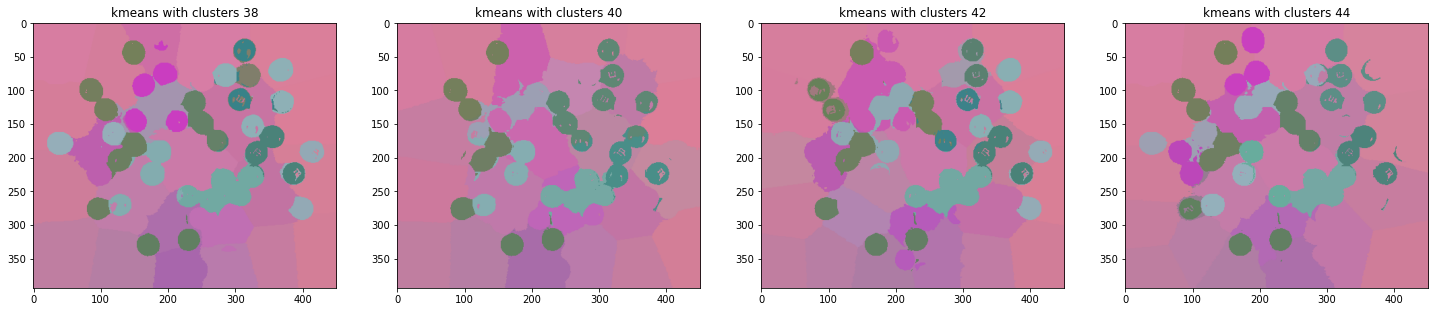

In [12]:
num = [38,40,42,44]
plt.figure(figsize=(25, 6))
for pp in range(len(num)):
    start = time.time()
    a,b,loss = my_kmeans(img_lab,num[pp])
    print('Loss is ',loss)
    end = time.time()
    print("running time:%.2fs"%(end-start))
    row,col = img[:,:,0].shape
    TMP = img.copy()
    for i in range(row):
        for j in range(col):
            fp = np.array(a[int(b[i,j])][:3])
            TMP[i,j:]=fp.astype(int)
    
    plt.subplot(1,4,pp+1)
    plt.title('kmeans with clusters '+str(num[pp]))
    plt.imshow(TMP)
    

# 2.2

0
1
2
3
4
5
6
7
8
9


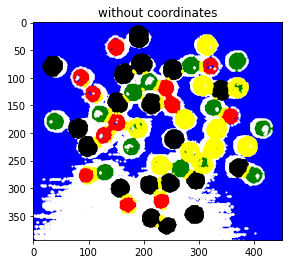

In [14]:
##################################################################
def count_diff(lab,x,y,clusters):
    MIN,MIN_=np.sum((clusters[0]-lab)**2) ,0
    for i in range(1,len(clusters)):
        now = np.sum((clusters[i]-lab)**2)
        if MIN>now:
            MIN=now
            MIN_=i
    return MIN_
def classifer(img,clusters):
    row,col = img[:,:,0].shape
    ans = np.zeros(img[:,:,0].shape)
    for i in range(row):
        for j in range(col):
            ans[i,j] = count_diff(img[i,j,:],i,j,clusters)
    return ans
def update(clusters, img, belonging):
    row,col = img[:,:,0].shape
    for k in range(len(clusters)):
        SUM = np.zeros(len(clusters[0]))
        cnt = 0
        for i in range(row):
            for j in range(col):
                if belonging[i,j] == k:
                    SUM += img[i,j,:]
                    cnt += 1
        SUM=np.array(SUM)
        if cnt==0:
            cnt=1
        clusters[k] = SUM/cnt
    return clusters
def my_kmeans(img,clusters_num):
    now = img.copy()
    row,col = img[:,:,0].shape
    # l a b
    lmin,lmax=now[:,:,0].min(),now[:,:,0].max()
    amin,amax=now[:,:,1].min(),now[:,:,1].max()
    bmin,bmax=now[:,:,2].min(),now[:,:,2].max()
    #initiate
    clusters = [[random.randint(lmin,lmax),random.randint(amin,amax),random.randint(bmin,bmax)] for i in range(clusters_num)]
    belonging = np.zeros(now[:,:,0].shape)
    for i in range(10):
        belonging = classifer(now,clusters)
        clusters = update(clusters,now,belonging)
        print(i)
    return clusters,belonging
a,b = my_kmeans(img_lab,7)
colour = ['red','blue','green','white','black','yellow','pink']
row,col = img[:,:,0].shape
for k in range(7):
    x,y=[],[]
    for i in range(row):
        for j in range(col):
            if b[i,j]==k:
                x.append(i)
                y.append(j)
    plt.scatter(y,x,color=colour[k],s=1)
plt.title('without coordinates')
plt.imshow(img)

# 2.3

0
1
2
3
4
5
6
7
8
9
[array([187.29592469, 123.71249845, 159.68789343, 196.18325957,
       112.19788746]), array([184.18763429, 129.18811803, 157.81610062, 196.81642686,
       337.6904411 ]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0

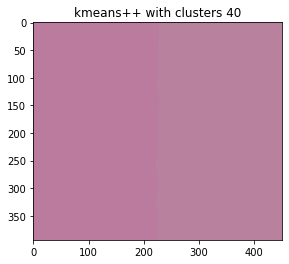

In [15]:
def count_diff(lab,x,y,clusters):
    lab=np.append(lab,x)
    lab=np.append(lab,y)
    diff = [np.sum(np.square(clusters[i]-lab)) for i in range(len(clusters))]
    return diff.index(min(diff))
def classifer(img,clusters):
    row,col = img[:,:,0].shape
    ans = np.zeros(img[:,:,0].shape)
    for i in range(row):
        for j in range(col):
            ans[i,j] = count_diff(img[i,j,:],i,j,clusters)
    return ans
def update(clusters, img, belonging):
    row,col = img[:,:,0].shape
    for k in range(len(clusters)):
        SUM = np.zeros(len(clusters[0]))
        cnt = 0
        for i in range(row):
            for j in range(col):
                if belonging[i,j] == k:
                    tmp = np.append(img[i,j,:],i)
                    tmp = np.append(tmp,j)
                    SUM += tmp
                    cnt += 1
        if cnt==0:
            cnt=1
        clusters[k] = SUM/cnt
    return clusters
def calculate_loss(clusters,img,belong):
    row,col = img[:,:,0].shape
    ans = 0
    for i in range(row):
        for j in range(col):
            tmp = img[i,j,:].copy()
            tmp = np.append(tmp,i)
            tmp = np.append(tmp,j)
            ans+=np.sum( np.square(tmp-clusters[int(belong[i,j])]) )
    return ans
def my_kmeansplus(img,clusters_num):
    now = img.copy()
    row,col = img[:,:,0].shape
    # l a b x y
    lmin,lmax=now[:,:,0].min(),now[:,:,0].max()
    amin,amax=now[:,:,1].min(),now[:,:,1].max()
    bmin,bmax=now[:,:,2].min(),now[:,:,2].max()
    #initiate
    clusters = [[random.randint(lmin,lmax),random.randint(amin,amax),random.randint(bmin,bmax),random.randint(0,col),random.randint(0,row)] for i in range(clusters_num)]
    r,c=img[:,:,0].shape
    recordx=np.array([[i for i in range(c)] for j in range(r)]).reshape(-1)
    recordy=np.array([[j for i in range(c)] for j in range(r)]).reshape(-1)
    dx2 = (img[:,:,0].reshape(-1)-clusters[0][0])**2 +(img[:,:,1].reshape(-1)-clusters[0][1])**2 +(img[:,:,2].reshape(-1)-clusters[0][2])**2 + (recordx-clusters[0][3])**2 + (recordy-clusters[0][4])**2
    px = dx2/dx2.sum()
    sum_x = px.cumsum()
    for i in range(1,clusters_num):
        tmp = random.random()
        for j in range(len(sum_x)):
            if sum_x[j]>tmp:
                break
        clusters[i]=[img[j//c,j%c,0], img[j//c,j%c,1], img[j//c,j%c,2], j//c, j%c]
    belonging = np.zeros(now[:,:,0].shape)
    
    for i in range(10):
        belonging = classifer(now,clusters)
        clusters = update(clusters,now,belonging)
        print(i)
    loss = calculate_loss(clusters,now,belonging)
    return clusters,belonging,loss


start = time.time()
a,b,loss = my_kmeansplus(img_lab,40)
print(a,b,loss)
end = time.time()
print("running time:%.2fs"%(end-start))
row,col = img[:,:,0].shape
TMP = img.copy()
for i in range(row):
    for j in range(col):
        fp = np.array(a[int(b[i,j])][:3])
        TMP[i,j:]=fp.astype(int)
plt.title('kmeans++ with clusters 40')
plt.imshow(TMP)